In [149]:
import numpy as np
import pickle as pkl
import hmmlearn as hmm
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [171]:
file = open('clean_extracted_data.pkl','rb')
data = pkl.load(file)
data.head()

,path,node,slot,port,pm,raw_data,z-score,timestamp
0,path_3,208-24781-95_1_2,2,8,OPOUT-OTS,"[14.300000190734865, 14.300000190734865, 14.30...","[-1.606452585907533, -1.606452585907533, -1.60...","[2020-01-17, 2020-01-18, 2020-01-19, 2020-01-2..."
1,path_5,f9e-c2fb2-00_1_2,2,8,OPIN-OTS,"[-4.699999809265137, -4.800000190734863, -4.80...","[-0.11154559786071622, -0.3160475996011312, -0...","[2020-01-17, 2020-01-18, 2020-01-19, 2020-01-2..."
2,path_5,f9e-c2fb2-00_1_2,2,6,OPIN-OTS,"[-0.699999988079071, -0.699999988079071, -0.69...","[-0.38573315088081656, -0.38573315088081656, -...","[2020-01-17, 2020-01-18, 2020-01-19, 2020-01-2..."
3,path_5,f9e-c2fb2-00_1_2,2,6,OPOUT-OTS,"[8.800000190734863, 8.899999618530273, 8.89999...","[-0.4175761901623922, -0.0847274439814516, -0....","[2020-01-17, 2020-01-18, 2020-01-19, 2020-01-2..."
4,path_5,f9e-c2fb2-00_1_2,2,8,OPOUT-OTS,"[8.600000381469728, 8.600000381469728, 8.60000...","[-0.14596176152485704, -0.14596176152485704, -...","[2020-01-17, 2020-01-18, 2020-01-19, 2020-01-2..."


In [5]:
exp = data.iloc[0,6]
exp

array([-1.60645259, -1.60645259, -1.60645259, -1.60645259, -1.60645259,
       -1.60645259, -1.60645259, -1.60645259, -1.60645259, -1.60645259,
       -1.9761401 , -1.60645259, -1.60645259, -1.60645259, -1.60645259,
        0.61166191,  0.61166191,  0.61166191,  0.61166191,  0.61166191,
        0.61166191,  0.61166191,  0.61166191,  0.61166191,  0.61166191,
        0.61166191,  0.61166191,  0.61166191,  0.61166191,  0.61166191,
        0.61166191,  0.61166191,  0.61166191,  0.61166191,  0.61166191,
        0.61166191,  0.61166191,  0.61166191,  0.61166191,  0.61166191,
        0.61166191,  0.61166191,  0.61166191,  0.61166191,  0.61166191,
        0.61166191,  0.61166191,  0.61166191,  0.61166191,  0.61166191,
        0.61166191,  0.61166191,  0.61166191,  0.61166191,  0.61166191])

In [35]:
from hmmlearn.hmm import GaussianHMM

'''
def fitHMM(Q, nSamples):
    # fit Gaussian HMM to Q
    model = GaussianHMM(n_components=2, n_iter=1000).fit(np.reshape(Q,[len(Q),1]))
     
    # classify each observation as state 0 or 1
    hidden_states = model.predict(np.reshape(Q,[len(Q),1]))
 
    # find parameters of Gaussian HMM
    mus = np.array(model.means_)
    sigmas = np.array(np.sqrt(np.array([np.diag(model.covars_[0]),np.diag(model.covars_[1])])))
    P = np.array(model.transmat_)
 
    # find log-likelihood of Gaussian HMM
    logProb = model.score(np.reshape(Q,[len(Q),1]))
 
    # generate nSamples from Gaussian HMM
    samples = model.sample(nSamples)
 
    # re-organize mus, sigmas and P so that first row is lower mean (if not already)
    if mus[0] > mus[1]:
        mus = np.flipud(mus)
        sigmas = np.flipud(sigmas)
        P = np.fliplr(np.flipud(P))
        hidden_states = 1 - hidden_states
 
    return hidden_states, mus, sigmas, P, logProb, samples
 
'''

In [36]:

Q = data.iloc[10,6]
 
# hidden_states, mus, sigmas, P, logProb, samples = fitHMM(Q, 100)
model = GaussianHMM(n_components=4, n_iter=500).fit(np.reshape(Q,[len(Q),1]))
hidden_states = model.predict(np.reshape(Q,[len(Q),1]))
# find parameters of Gaussian HMM
mus1 = np.array(model.means_)
sigmas = np.array(np.sqrt(np.array([np.diag(model.covars_[0]),np.diag(model.covars_[1]),
                                    np.diag(model.covars_[2]),np.diag(model.covars_[3])])))
P = np.array(model.transmat_)

In [40]:
print(model.covars_)
print(sigmas)
model.startprob_

[[[0.00025641]]

 [[0.00114009]]

 [[0.00200531]]

 [[0.00863856]]]
[[0.01601282]
 [0.03376527]
 [0.04478067]
 [0.09294386]]


1.0

In [85]:
def map_hmms(data):
    '''
    map the time series to hmms
    '''
    n = 3 #number of hidden states
    # print ("------Doing Baum-welch-------")
    df = pd.DataFrame(columns=['Node', 'StartProb','Transition', 'Means', 'Covars'], index=range(data.shape[0]))
    for i in range(data.shape[0]):
        current= data.iloc[i,6]
        #gmmhmm = GMHMM(n, m, d, a, means, covars, w, pi, init_type='user', verbose=True)
        #gmmhmm.train(current, 1000)
        Q = data.iloc[i,6]
        model = GaussianHMM(n_components=3, n_iter=1000).fit(np.reshape(Q,[len(Q),1]))
        hidden_states = model.predict(np.reshape(Q,[len(Q),1]))
            # find parameters of Gaussian HMM
        mus = np.array(model.means_)
        sigmas = np.array(np.sqrt(np.array([np.diag(model.covars_[0]),np.diag(model.covars_[1]),np.diag(model.covars_[2])])))
        trans = np.array(model.transmat_)
        pi = model.startprob_
        node = data.iloc[i,1]
        df.loc[i] = pd.Series({'Node':node, 'StartProb':pi, 'Transition':trans, 'Means':mus, 'Covars':model.covars_})
    return(df)

def calc_prob_mat(data, df_res):
    '''calculate the probability/likelihood matrix'''
    n = data.shape[0]
    res = np.empty((n,n))
    for j in range(n):
        Q = data.iloc[j,6]
        crt_hmm = GaussianHMM(n_components=3, n_iter=1000).fit(np.reshape(Q,[len(Q),1]))
        # find parameters of Gaussian HMM
        mus = np.array(crt_hmm.means_)
        sigmas = np.array(np.sqrt(np.array([np.diag(crt_hmm.covars_[0]),np.diag(crt_hmm.covars_[1]),np.diag(crt_hmm.covars_[2])])))
        trans = np.array(crt_hmm.transmat_)
        pi = crt_hmm.startprob_
        for i in range(n):
            crt_obs = data.iloc[i,6]
            logProb = crt_hmm.score(np.reshape(crt_obs,[len(crt_obs),1]))
            # logProb = crt_hmm.score(crt_obs)
            res[i,j] = logProb
    return res


In [44]:
hmm_df = map_hmms(data)
hmm_df.head()

c:\users\onsb\appdata\local\programs\python\python38\lib\site-packages\hmmlearn\hmm.py:208: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(X)
c:\users\onsb\appdata\local\programs\python\python38\lib\site-packages\hmmlearn\hmm.py:208: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(X)
c:\users\onsb\appdata\local\programs\python\python38\lib\site-packages\hmmlearn\hmm.py:208: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(X)
c:\users\onsb\appdata\local\programs\python\python38\lib\site-packages\hmmlearn\hmm.py:208: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(X)
c:\users\onsb\appdata\local\programs\python\python38\lib\site-pa

,Node,StartProb,Transition,Means,Covars
0,208-24781-95_1_2,"[3.2379315773932423e-16, 0.0, 0.9999999999999998]","[[3.518277906777804e-14, 8.945067030205713e-16...","[[-1.976033748717719], [0.6116619075079123], [...","[[[0.010036427823592584]], [[0.000250000000000..."
1,f9e-c2fb2-00_1_2,"[1.0, 0.0, 2.4927382685551923e-27]","[[0.9089360624610939, 0.045504744056712246, 0....","[[-0.27432651961576504], [2.228856990200237], ...","[[[0.006834105794524259]], [[0.011437202439878..."
2,f9e-c2fb2-00_1_2,"[1.0, 0.0, 1.1214774187367371e-25]","[[0.7941176378218416, 0.02941178049925672, 0.1...","[[-0.3857331511516731], [2.2524418451410924], ...","[[[0.0002941178347663118]], [[0.00111111111111..."
3,f9e-c2fb2-00_1_2,"[9.893989250479472e-07, 0.0, 0.9999990106010749]","[[0.29409929083778835, 1.9933486853021784e-09,...","[[-0.5536389763936691], [2.2452296508409746], ...","[[[0.08852203024290856]], [[0.0011111111111111..."
4,f9e-c2fb2-00_1_2,"[1.0, 0.0, 3.450859286500174e-21]","[[0.9105841372697184, 0.04431060919713277, 0.0...","[[-0.1897342063677774], [2.1916797306063236], ...","[[[0.010644534936282722]], [[0.020032915533573..."


In [86]:
l_prob_mat = calc_prob_mat(data, hmm_df)

c:\users\onsb\appdata\local\programs\python\python38\lib\site-packages\hmmlearn\hmm.py:208: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(X)
c:\users\onsb\appdata\local\programs\python\python38\lib\site-packages\hmmlearn\hmm.py:208: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(X)
c:\users\onsb\appdata\local\programs\python\python38\lib\site-packages\hmmlearn\hmm.py:208: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(X)
c:\users\onsb\appdata\local\programs\python\python38\lib\site-packages\hmmlearn\hmm.py:208: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(X)
c:\users\onsb\appdata\local\programs\python\python38\lib\site-pa

In [90]:
import math
nb =0
n = l_prob_mat.shape[0]
for i in range(n):
    for j in range(n):
        if np.isinf(l_prob_mat[i,j]):
            nb+=1
print(nb)
l_prob_mat.mean(axis = 0).mean()

0


-1990.4369821585876

In [93]:
prob_mat = np.exp(l_prob_mat)
prob_mat_norm = prob_mat/prob_mat.sum(axis=0)

In [95]:
# get rid of zeros in prb_mat_norm
nb = 0
for i in range(n):
    for j in range(n):
        #if nn[i,j] == True:
        #    nb+=1
        if prob_mat_norm[i,j] == 0:
            prob_mat_norm[i,j] = prob_mat_norm[:,j].mean()
            nb+=1

In [101]:
dist_mat = np.empty_like(prob_mat)
n = prob_mat.shape[0]
for i in range(n):
    for j in range(n):
        t_i = l_prob_mat[:,i]
        t_i_n = prob_mat_norm[:,i]
        t_j = l_prob_mat[:,j]
        t_j_n = prob_mat_norm[:,j]
        dist_mat[i,j] = (t_i_n * (t_i-t_j) + t_j_n * (t_j-t_i)).sum()/2


In [108]:
nb = 0
for i in range(n):
    for j in range(n):
        #if nn[i,j] == True:
        #    nb+=1
        if dist_mat[i,j]==0 :
            # dist_mat[i,j] = prob_mat_norm[:,j].mean()
            #print(i,j)
            nb+=1
print(nb)

1959


In [114]:
import random
import matplotlib.pyplot as plt

def kMedoids(D, k, tmax=100):
    # determine dimensions of distance matrix D
    m, n = D.shape
    #print (m,n)

    if k > n:
        raise Exception('too many medoids')

    # find a set of valid initial cluster medoid indices since we
    # can't seed different clusters with two points at the same location
    valid_medoid_inds = set(range(n))
    
    #print ('haha',valid_medoid_inds)
    
    invalid_medoid_inds = set([])
    rs,cs = np.where(D==0)
    #print (rs,cs)
    # the rows, cols must be shuffled because we will keep the first duplicate below
    index_shuf = list(range(len(rs)))
    np.random.shuffle(index_shuf)
    rs = rs[index_shuf]
    cs = cs[index_shuf]
    #print (rs,cs)
    for r,c in zip(rs,cs):
        # if there are two points with a distance of 0...
        # keep the first one for cluster init
        if r < c and r not in invalid_medoid_inds:
            invalid_medoid_inds.add(c)
    valid_medoid_inds = list(valid_medoid_inds - invalid_medoid_inds)

    if k > len(valid_medoid_inds):
        raise Exception('too many medoids (after removing {} duplicate points)'.format(
            len(invalid_medoid_inds)))

    # randomly initialize an array of k medoid indices
    M = np.array(valid_medoid_inds)
    np.random.shuffle(M)
    M = np.sort(M[:k])

    # create a copy of the array of medoid indices
    Mnew = np.copy(M)

    # initialize a dictionary to represent clusters
    C = {}
    for t in range(tmax):
        # determine clusters, i. e. arrays of data indices
        J = np.argmin(D[:,M], axis=1)
        for kappa in range(k):
            C[kappa] = np.where(J==kappa)[0]
        # update cluster medoids
        for kappa in range(k):
            J = np.mean(D[np.ix_(C[kappa],C[kappa])],axis=1)
            j = np.argmin(J)
            Mnew[kappa] = C[kappa][j]
        np.sort(Mnew)
        # check for convergence
        if np.array_equal(M, Mnew):
            break
        M = np.copy(Mnew)
    else:
        # final update of cluster memberships
        J = np.argmin(D[:,M], axis=1)
        for kappa in range(k):
            C[kappa] = np.where(J==kappa)[0]

    # return results
    return (M, C)

In [228]:
M300, C300 = kMedoids(dist_mat, 300, tmax=100)

In [177]:
M5, c5 = kMedoids(dist_mat, 5, tmax=100)

array([1707,  861,  293,  471,  869])

In [165]:
M10, C10 = kMedoids(dist_mat, 100, tmax=100)

{0: array([   9,   10,   11,   12,   14,   15,   16,   17,   18,   19,   21,
          22,   23,   24,   25,   26,   27,   28,   29,   30,   31,   32,
          46,   47,   48,   53,   54,   56,   57,   58,   61,   64,   66,
          67,   95,   96,  104,  105,  127,  129,  162,  170,  176,  177,
         180,  195,  196,  197,  198,  199,  200,  201,  202,  232,  233,
         237,  238,  239,  241,  243,  244,  267,  268,  270,  292,  293,
         294,  295,  296,  297,  301,  310,  318,  332,  335,  336,  340,
         350,  354,  365,  370,  375,  380,  381,  391,  392,  440,  443,
         446,  468,  470,  474,  479,  497,  519,  523,  529,  533,  553,
         566,  567,  568,  571,  572,  573,  574,  577,  583,  586,  587,
         588,  590,  591,  592,  594,  598,  599,  600,  601,  602,  604,
         605,  606,  608,  610,  611,  612,  615,  621,  628,  629,  633,
         652,  655,  657,  689,  692,  693,  708,  712,  720,  722,  725,
         734,  795,  817,  836,  84

In [229]:
labels_300 = np.zeros(shape=(1957), dtype=int)-1
for i in range(300):
    l = list(C300[i])
    for j in l:
        labels_300[j] = int(i)
nb = 0
for i in range(n):
    if labels_300[i] == -1:
        nb+=1
print(nb)

0


In [179]:
data['label_5'] = labels_5
data.head()

,,0,1,2,3,4,5,6,7,8,9,...,46,47,48,49,50,51,52,53,54,label_5
,label,,,,,,,,,,,,,,,,,,,,,
0,7,-1.606453,-1.606453,-1.606453,-1.606453,-1.606453,-1.606453,-1.606453,-1.606453,-1.606453,-1.606453,...,0.611662,0.611662,0.611662,0.611662,0.611662,0.611662,0.611662,0.611662,0.611662,1
1,6,-0.111546,-0.316048,-0.316048,-0.316048,-0.316048,-0.316048,-0.316048,-0.316048,-0.316048,-0.316048,...,2.137968,2.137968,2.137968,2.137968,2.137968,2.342469,2.342469,2.342469,2.342469,0
2,6,-0.385733,-0.385733,-0.385733,-0.385733,-0.385733,-0.385733,-0.385733,-0.385733,-0.385733,-0.605581,...,2.252442,2.252442,2.252442,2.252442,2.252442,2.252442,2.252442,2.252442,2.252442,0
3,6,-0.417576,-0.084727,-0.084727,-0.417576,-0.417576,-0.417576,-0.417576,-0.417576,-0.417576,-0.417576,...,2.245230,2.245230,2.245230,2.245230,2.245230,2.245230,2.245230,2.245230,2.245230,0
4,6,-0.145962,-0.145962,-0.145962,-0.145962,-0.422789,-0.145962,-0.145962,-0.422789,-0.145962,-0.145962,...,2.068645,2.068645,2.068645,2.068645,2.068645,2.345473,2.345473,2.345473,2.345473,0


In [142]:
d = data.iloc[0,6].shape[0]
data_ = np.empty([n,d])
for i in range(n):
    data_[i] = data.iloc[i,6]
print(data.iloc[0,6])
print(data_[0])

[-1.60645259 -1.60645259 -1.60645259 -1.60645259 -1.60645259 -1.60645259
 -1.60645259 -1.60645259 -1.60645259 -1.60645259 -1.9761401  -1.60645259
 -1.60645259 -1.60645259 -1.60645259  0.61166191  0.61166191  0.61166191
  0.61166191  0.61166191  0.61166191  0.61166191  0.61166191  0.61166191
  0.61166191  0.61166191  0.61166191  0.61166191  0.61166191  0.61166191
  0.61166191  0.61166191  0.61166191  0.61166191  0.61166191  0.61166191
  0.61166191  0.61166191  0.61166191  0.61166191  0.61166191  0.61166191
  0.61166191  0.61166191  0.61166191  0.61166191  0.61166191  0.61166191
  0.61166191  0.61166191  0.61166191  0.61166191  0.61166191  0.61166191
  0.61166191]
[-1.60645259 -1.60645259 -1.60645259 -1.60645259 -1.60645259 -1.60645259
 -1.60645259 -1.60645259 -1.60645259 -1.60645259 -1.9761401  -1.60645259
 -1.60645259 -1.60645259 -1.60645259  0.61166191  0.61166191  0.61166191
  0.61166191  0.61166191  0.61166191  0.61166191  0.61166191  0.61166191
  0.61166191  0.61166191  0.61166191 

In [180]:
data_df = pd.DataFrame(data_)
data_df.head()
#cluster_found = labels
#f = plt.figure(figsize = (10,5))
#f = plot_tsne(cons, cluster_found, f)
#plt.show()


,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,-1.606453,-1.606453,-1.606453,-1.606453,-1.606453,-1.606453,-1.606453,-1.606453,-1.606453,-1.606453,...,0.611662,0.611662,0.611662,0.611662,0.611662,0.611662,0.611662,0.611662,0.611662,0.611662
1,-0.111546,-0.316048,-0.316048,-0.316048,-0.316048,-0.316048,-0.316048,-0.316048,-0.316048,-0.316048,...,-0.111546,2.137968,2.137968,2.137968,2.137968,2.137968,2.342469,2.342469,2.342469,2.342469
2,-0.385733,-0.385733,-0.385733,-0.385733,-0.385733,-0.385733,-0.385733,-0.385733,-0.385733,-0.605581,...,-0.385733,2.252442,2.252442,2.252442,2.252442,2.252442,2.252442,2.252442,2.252442,2.252442
3,-0.417576,-0.084727,-0.084727,-0.417576,-0.417576,-0.417576,-0.417576,-0.417576,-0.417576,-0.417576,...,-0.417576,2.245230,2.245230,2.245230,2.245230,2.245230,2.245230,2.245230,2.245230,2.245230
4,-0.145962,-0.145962,-0.145962,-0.145962,-0.422789,-0.145962,-0.145962,-0.422789,-0.145962,-0.145962,...,-0.145962,2.068645,2.068645,2.068645,2.068645,2.068645,2.345473,2.345473,2.345473,2.345473


In [170]:
data.head()

,,0,1,2,3,4,5,6,7,8,9,...,46,47,48,49,50,51,52,53,54,label_10
,label,,,,,,,,,,,,,,,,,,,,,
0,10.0,-1.606453,-1.606453,-1.606453,-1.606453,-1.606453,-1.606453,-1.606453,-1.606453,-1.606453,-1.606453,...,0.611662,0.611662,0.611662,0.611662,0.611662,0.611662,0.611662,0.611662,0.611662,7
1,0.0,-0.111546,-0.316048,-0.316048,-0.316048,-0.316048,-0.316048,-0.316048,-0.316048,-0.316048,-0.316048,...,2.137968,2.137968,2.137968,2.137968,2.137968,2.342469,2.342469,2.342469,2.342469,6
2,0.0,-0.385733,-0.385733,-0.385733,-0.385733,-0.385733,-0.385733,-0.385733,-0.385733,-0.385733,-0.605581,...,2.252442,2.252442,2.252442,2.252442,2.252442,2.252442,2.252442,2.252442,2.252442,6
3,0.0,-0.417576,-0.084727,-0.084727,-0.417576,-0.417576,-0.417576,-0.417576,-0.417576,-0.417576,-0.417576,...,2.245230,2.245230,2.245230,2.245230,2.245230,2.245230,2.245230,2.245230,2.245230,6
4,0.0,-0.145962,-0.145962,-0.145962,-0.145962,-0.422789,-0.145962,-0.145962,-0.422789,-0.145962,-0.145962,...,2.068645,2.068645,2.068645,2.068645,2.068645,2.345473,2.345473,2.345473,2.345473,6


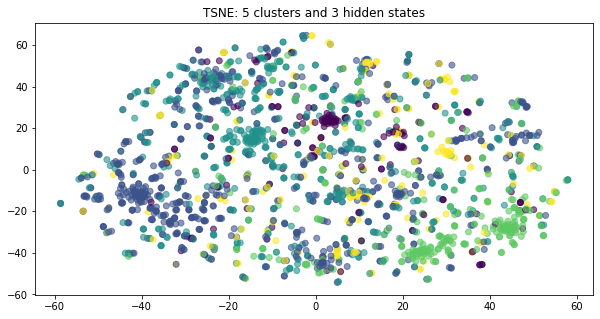

In [184]:
fig = plt.figure(figsize = (10,5))
cluster_found_sr = pd.Series(labels_5, name='label')
data = data_df.set_index(cluster_found_sr, append = True)
res = TSNE().fit_transform(np.asarray(data_df))
cluster_values = sorted(data.index.get_level_values('label').unique())
# cmap = matplotlib.colors.LinearSegmentedColormap.from_list(cluster_values, color_list)
axarr = fig.add_subplot(1,1,1)
plt.scatter(res[:, 0], res[:, 1], c = data.index.get_level_values('label'), alpha=0.6,)

# plt.show()
plt.title('TSNE: 5 clusters and 3 hidden states')
plt.show()
#plt.savefig('figs/tsne_10clusters_3hs.png')

In [186]:
file = open('clean_extracted_data.pkl','rb')
original = pkl.load(file)
original['label_3'] = labels_3
original['label_5'] = labels_5
original['label_10'] = labels_10
original['label_20'] = labels
original.head()

,path,node,slot,port,pm,raw_data,z-score,timestamp,label_3,label_5,label_10,label_20
0,path_3,208-24781-95_1_2,2,8,OPOUT-OTS,"[14.300000190734865, 14.300000190734865, 14.30...","[-1.606452585907533, -1.606452585907533, -1.60...","[2020-01-17, 2020-01-18, 2020-01-19, 2020-01-2...",2,1,7,10.0
1,path_5,f9e-c2fb2-00_1_2,2,8,OPIN-OTS,"[-4.699999809265137, -4.800000190734863, -4.80...","[-0.11154559786071622, -0.3160475996011312, -0...","[2020-01-17, 2020-01-18, 2020-01-19, 2020-01-2...",1,0,6,0.0
2,path_5,f9e-c2fb2-00_1_2,2,6,OPIN-OTS,"[-0.699999988079071, -0.699999988079071, -0.69...","[-0.38573315088081656, -0.38573315088081656, -...","[2020-01-17, 2020-01-18, 2020-01-19, 2020-01-2...",1,0,6,0.0
3,path_5,f9e-c2fb2-00_1_2,2,6,OPOUT-OTS,"[8.800000190734863, 8.899999618530273, 8.89999...","[-0.4175761901623922, -0.0847274439814516, -0....","[2020-01-17, 2020-01-18, 2020-01-19, 2020-01-2...",0,0,6,0.0
4,path_5,f9e-c2fb2-00_1_2,2,8,OPOUT-OTS,"[8.600000381469728, 8.600000381469728, 8.60000...","[-0.14596176152485704, -0.14596176152485704, -...","[2020-01-17, 2020-01-18, 2020-01-19, 2020-01-2...",1,0,6,0.0


In [196]:
tp_3 = 0
tp_5 = 0
tp_10 = 0
tp_20 = 0
n = original.shape[0]
for i in range(n):
    for j in range(i+1,n):
        if (original.iloc[i,8] == original.iloc[j,8]) and (original.iloc[i,0] == original.iloc[j,0]):
            tp_3+=1
        if (original.iloc[i,9] == original.iloc[j,9]) and (original.iloc[i,0] == original.iloc[j,0]):
            tp_5+=1
        if (original.iloc[i,10] == original.iloc[j,10]) and (original.iloc[i,0] == original.iloc[j,0]):
            tp_10+=1
        if (original.iloc[i,11] == original.iloc[j,11]) and (original.iloc[i,0] == original.iloc[j,0]):
            tp_20+=1

In [197]:
tp_3 = 0
fn_3 = 0
tp_5 = 0
fn_5 = 0
tp_10 = 0
fn_10 = 0
tp_20 = 0
fn_20 = 0
n = original.shape[0]
for i in range(n):
    for j in range(i+1,n):
        if (original.iloc[i,0] == original.iloc[j,0]):
            if (original.iloc[i,8] == original.iloc[j,8]):
                tp_3 += 1
            else:
                fn_3 += 1
            if (original.iloc[i,9] == original.iloc[j,9]):
                tp_5 += 1
            else:
                fn_5 += 1
            if (original.iloc[i,10] == original.iloc[j,10]):
                tp_10 += 1
            else:
                fn_10 += 1
            if (original.iloc[i,11] == original.iloc[j,11]):
                tp_20 += 1
            else:
                fn_20 += 1
                
                

In [203]:
tn_3 = 0
fp_3 = 0
tn_5 = 0
fp_5 = 0
tn_10 = 0
fp_10 = 0
tn_20 = 0
fp_20 = 0
n = original.shape[0]
for i in range(n):
    for j in range(i+1,n):
        if (original.iloc[i,0] != original.iloc[j,0]):
            if (original.iloc[i,8] == original.iloc[j,8]):
                fp_3 += 1
            else:
                tn_3 += 1
            if (original.iloc[i,9] == original.iloc[j,9]):
                fp_5 += 1
            else:
                tn_5 += 1
            if (original.iloc[i,10] == original.iloc[j,10]):
                fp_10 += 1
            else:
                tn_10 += 1
            if (original.iloc[i,11] == original.iloc[j,11]):
                fp_20 += 1
            else:
                tn_20 += 1

In [218]:
acc_3 = (tp_3+tn_3)/(tp_3+tn_3+fp_3+fn_3)
prec_3 = tp_3/(tp_3+fp_3)
rec_3 = tp_3/(tp_3+fn_3)
f1_3 = 2*prec_3*rec_3/(prec_3+rec_3)

In [214]:
acc_5 = (tp_5+tn_5)/(tp_5+tn_5+fp_5+fn_5)
prec_5 = tp_5/(tp_5+fp_5)
rec_5 = tp_3/(tp_5+fn_5)
f1_5 = 2*prec_5*rec_5/(prec_5+rec_5)

In [215]:
acc_10 = (tp_10+tn_10)/(tp_10+tn_10+fp_10+fn_10)
prec_10 = tp_10/(tp_10+fp_10)
rec_10 = tp_10/(tp_10+fn_10)
f1_10 = 2*prec_10*rec_10/(prec_10+rec_10)

In [216]:
acc_20 = (tp_20+tn_20)/(tp_20+tn_20+fp_20+fn_20)
prec_20 = tp_20/(tp_20+fp_20)
rec_20 = tp_20/(tp_20+fn_20)
f1_20 = 2*prec_20*rec_20/(prec_20+rec_20)

In [219]:
print(f1_3)
print(f1_5)
print(f1_10)
print(f1_20)

0.008924013637289365
0.010910913469233284
0.015931319019501174
0.02013247516927755


In [230]:
original['label_300'] = labels_300
original.head()

,path,node,slot,port,pm,raw_data,z-score,timestamp,label_3,label_5,label_10,label_20,label_100,label_300
0,path_3,208-24781-95_1_2,2,8,OPOUT-OTS,"[14.300000190734865, 14.300000190734865, 14.30...","[-1.606452585907533, -1.606452585907533, -1.60...","[2020-01-17, 2020-01-18, 2020-01-19, 2020-01-2...",2,1,7,10.0,13,28
1,path_5,f9e-c2fb2-00_1_2,2,8,OPIN-OTS,"[-4.699999809265137, -4.800000190734863, -4.80...","[-0.11154559786071622, -0.3160475996011312, -0...","[2020-01-17, 2020-01-18, 2020-01-19, 2020-01-2...",1,0,6,0.0,74,257
2,path_5,f9e-c2fb2-00_1_2,2,6,OPIN-OTS,"[-0.699999988079071, -0.699999988079071, -0.69...","[-0.38573315088081656, -0.38573315088081656, -...","[2020-01-17, 2020-01-18, 2020-01-19, 2020-01-2...",1,0,6,0.0,15,0
3,path_5,f9e-c2fb2-00_1_2,2,6,OPOUT-OTS,"[8.800000190734863, 8.899999618530273, 8.89999...","[-0.4175761901623922, -0.0847274439814516, -0....","[2020-01-17, 2020-01-18, 2020-01-19, 2020-01-2...",0,0,6,0.0,15,1
4,path_5,f9e-c2fb2-00_1_2,2,8,OPOUT-OTS,"[8.600000381469728, 8.600000381469728, 8.60000...","[-0.14596176152485704, -0.14596176152485704, -...","[2020-01-17, 2020-01-18, 2020-01-19, 2020-01-2...",1,0,6,0.0,74,257


In [223]:
tp_100 = 0
fn_100 = 0
n = original.shape[0]
for i in range(n):
    for j in range(i+1,n):
        if (original.iloc[i,0] == original.iloc[j,0]):
            if (original.iloc[i,12] == original.iloc[j,12]):
                tp_100 += 1
            else:
                fn_100 += 1

fp_100 = 0
tn_100 = 0
for i in range(n):
    for j in range(i+1,n):
        if (original.iloc[i,0] != original.iloc[j,0]):
            if (original.iloc[i,12] == original.iloc[j,12]):
                fp_100 += 1
            else:
                tn_100 += 1

In [224]:
acc_100 = (tp_100+tn_100)/(tp_100+tn_100+fp_100+fn_100)
prec_100 = tp_100/(tp_100+fp_100)
rec_100 = tp_100/(tp_100+fn_100)
f1_100 = 2*prec_100*rec_100/(prec_100+rec_100)

In [225]:
print(f1_100)

0.04240457595424046


In [231]:
tp_300 = 0
fn_300 = 0
for i in range(n):
    for j in range(i+1,n):
        if (original.iloc[i,0] == original.iloc[j,0]):
            if (original.iloc[i,13] == original.iloc[j,13]):
                tp_300 += 1
            else:
                fn_300 += 1

fp_300 = 0
tn_300 = 0
for i in range(n):
    for j in range(i+1,n):
        if (original.iloc[i,0] != original.iloc[j,0]):
            if (original.iloc[i,13] == original.iloc[j,13]):
                fp_300 += 1
            else:
                tn_300 += 1

In [232]:
acc_300 = (tp_300+tn_300)/(tp_300+tn_300+fp_300+fn_300)
prec_300 = tp_300/(tp_300+fp_300)
rec_300 = tp_300/(tp_300+fn_300)
f1_300 = 2*prec_300*rec_300/(prec_300+rec_300)

In [233]:
print(f1_300)

0.06273436104993751


In [238]:
import warnings
warnings.filterwarnings('ignore')
def calc_prob_mat_2(data):
    n = data.shape[0]
    res = np.empty((n,n))
    for j in range(n):
        Q = data.iloc[j,6]
        crt_hmm = GaussianHMM(n_components=2, n_iter=1000).fit(np.reshape(Q,[len(Q),1]))
        # find parameters of Gaussian HMM
        mus = np.array(crt_hmm.means_)
        sigmas = np.array(np.sqrt(np.array([np.diag(crt_hmm.covars_[0]),np.diag(crt_hmm.covars_[1])])))
        trans = np.array(crt_hmm.transmat_)
        pi = crt_hmm.startprob_
        for i in range(n):
            crt_obs = data.iloc[i,6]
            logProb = crt_hmm.score(np.reshape(crt_obs,[len(crt_obs),1]))
            # logProb = crt_hmm.score(crt_obs)
            res[i,j] = logProb
    return res

In [239]:
l_prob_mat_2 = calc_prob_mat_2(original)

In [241]:
import math
nb =0
n = l_prob_mat_2.shape[0]
for i in range(n):
    for j in range(n):
        if np.isnan(l_prob_mat_2[i,j]):
            nb+=1
print(nb)
l_prob_mat_2.mean(axis = 0).mean()

0


-2039.3896359168384

In [246]:
prob_mat2 = np.exp(l_prob_mat_2)
prob_mat_norm2 = prob_mat2/prob_mat2.sum(axis=0)
nb = 0
for i in range(n):
    for j in range(n):
        #if nn[i,j] == True:
        #    nb+=1
        if prob_mat_norm2[i,j] == 0:
            #prob_mat_norm2[i,j] = prob_mat_norm[:,j].mean()
            nb+=1
nb/(n*n)

0.1059859017940394

In [248]:
dist_mat2 = np.empty_like(prob_mat2)
n = prob_mat2.shape[0]
for i in range(n):
    for j in range(n):
        t_i = l_prob_mat_2[:,i]
        t_i_n = prob_mat_norm2[:,i]
        t_j = l_prob_mat_2[:,j]
        t_j_n = prob_mat_norm2[:,j]
        dist_mat2[i,j] = (t_i_n * (t_i-t_j) + t_j_n * (t_j-t_i)).sum()/2


In [249]:
nb = 0
for i in range(n):
    for j in range(n):
        #if nn[i,j] == True:
        #    nb+=1
        if dist_mat2[i,j]==0 :
            # dist_mat[i,j] = prob_mat_norm[:,j].mean()
            #print(i,j)
            nb+=1
print(nb)

1959


In [250]:
M300_2, C300_2 = kMedoids(dist_mat2, 300, tmax=100)

In [282]:
cluster1_100 = np.empty(shape=(len(C100[0]),55))
j = 0
for i in C100[0]:
    cluster1_100[j,:] = original.iloc[i,6]
    j+=1

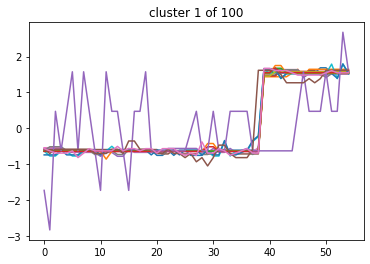

In [287]:
x = np.array(range(55))
for i in range(len(C100[0])):
    plt.plot(x,cluster1_100[i,:])
plt.title('cluster 1 of 100')
plt.show()

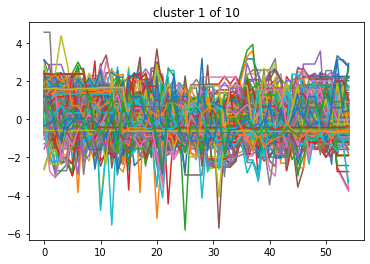

In [288]:
cluster1_10 = np.empty(shape=(len(C10[0]),55))
j = 0
for i in C10[0]:
    cluster1_10[j,:] = original.iloc[i,6]
    j+=1
for i in range(len(C10[0])):
    plt.plot(x,cluster1_10[i,:])
plt.title('cluster 1 of 10')
plt.show()

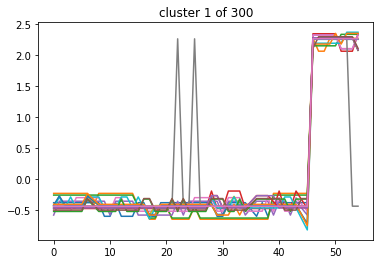

In [291]:
cluster1_300 = np.empty(shape=(len(C300[0]),55))
j = 0
for i in C300[0]:
    cluster1_300[j,:] = original.iloc[i,6]
    j+=1
for i in range(len(C300[0])):
    plt.plot(x,cluster1_300[i,:])
plt.title('cluster 1 of 300')
plt.show()

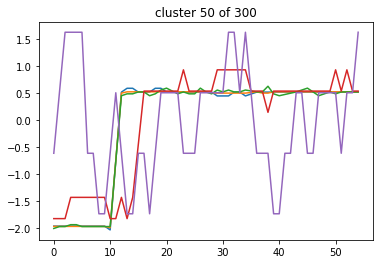

In [292]:
cluster50_300 = np.empty(shape=(len(C300[49]),55))
j = 0
for i in C300[49]:
    cluster50_300[j,:] = original.iloc[i,6]
    j+=1
for i in range(len(C300[49])):
    plt.plot(x,cluster50_300[i,:])
plt.title('cluster 50 of 300')
plt.show()

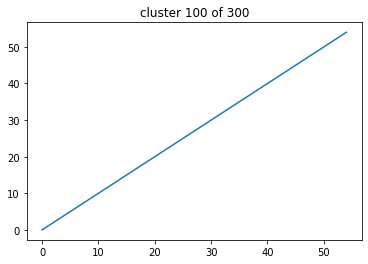

In [295]:
cluster100_300 = np.empty(shape=(len(C300[99]),55))
j = 0
for i in C300[99]:
    cluster50_300[j,:] = original.iloc[i,6]
    j+=1
for i in range(len(C300[99])):
    plt.plot(x,cluster100_300[i,:])
plt.title('cluster 100 of 300')
plt.show()